# Time-dependent heat equation - Implicit scheme

For this final exercise, we will redo the previous example with the heat equation, but this time we will use an **implicit scheme**.
Recall this means that unknown values at time step $t^{n + 1}$ are included in the equations to be solved at time step $t^n$. 
While this is _computationally more expensive_ as it involves solving a matrix equation at each step, it grants _better numerical stability_, potentially allowing you to use a larger time step.
Let's see how we can use Python to do this.

## Summary of commands

In this exercise, we will apply several of the commands we've already learned!

## Demo

Heat generated from an electric wire is defined by the time-dependent heat equation:

$$ \lambda^2 \dfrac{\partial^2 u}{\partial x^2} + q = \dfrac{\partial u}{\partial t} $$

with $u(0,t) = u(L,t) = 0$ and $u(x,0) = 0$.

Use the fully implicit discretization scheme with $N = 10$, $L = 1$, $\lambda = 1$, and $q = 1$ to find the temperature distribution at $t = \begin{bmatrix} 0 & 0.01 & 0.05 & 0.1 & 1 \end{bmatrix}$.
Take $dt = 0.01$.

Note: The fully implicit distribution scheme is $\lambda^2 \dfrac{u_{i-1}^{n+1} - 2u_i^{n+1} + u_{i+1}^{n+1}}{\Delta x^2} + q = \dfrac{u_{i}^{n+1} - u_i^n}{\Delta t}$.

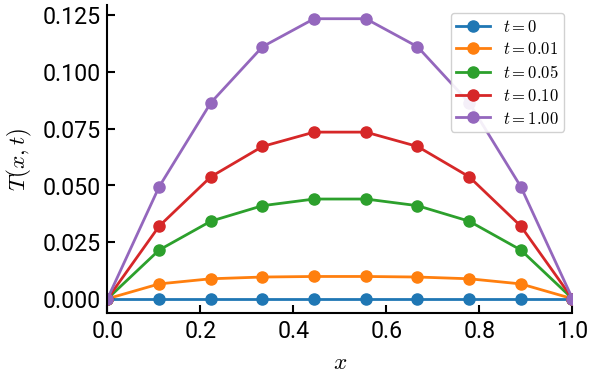

In [8]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# helper function to make tridiagonal matrices
def make_tridiag(a, b, c):
    return np.diag(a[1:], -1) + np.diag(b, 0) + np.diag(c[:-1], 1)
    
# constants
N = 10
L = 1
h = L/(N-1)
lamda = 1
q = 1
dt = 0.01

# initialize A
r = lamda**2 * dt / h**2
A = make_tridiag(-r * np.ones(N-2), (1 + 2*r) * np.ones(N-2), -r * np.ones(N-2))
b = q * dt * np.ones(N-2)

# initialize solution
t = np.array([0, 0.01, 0.05, 0.1, 1])
x = np.linspace(0, L, N)
u = np.zeros(N)

# plot initial condition
fig, ax = plt.subplots()
ax.plot(x, u, 'o-', lw=2, label="$t = 0$")
ax.set(xlabel='$x$', ylabel="$T(x,t)$", xlim=[0,1])

# solve
for j in range(1, int(t[-1]/dt)+1):
    u[1:-1] = np.linalg.solve(A, b + u[1:-1])
    if j * dt in t:
        ax.plot(x, u, 'o-', lw=2, label=f"$t = {j * dt:.2f}$")

ax.legend(fontsize=12, framealpha=0.9)
plt.show()